<a href="https://colab.research.google.com/github/choi4490/AAA/blob/main/GS%EA%B1%B4%EC%84%A4_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B5%9C%EC%9B%90%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


a=100
b=3
print(a**b)

1000000


표준편차는 **Pandas**

# SVM 머신러닝 --> TPMS 실행내역 비목 자동부여하기

# 새 섹션

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. 데이터 준비
# 예시 데이터: 내역명과 비목번호
# 학습용  # 최종테스트 .타켓(내역명)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_ML_WONWOO.csv')
final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST_WONWOO.csv')
# print(df.info())
# print(df.head())

# X_train=df[["item"]]    # 학습자료의 아이템 칼럼만
# y_train=df[["cost_categoty"]]    # 학습자료의 비목번호만

# 2. 텍스트 전처리
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['item'])    # 학습자료의 아이템 칼럼만
y = df['cost_category']                     # 학습자료의 비목번호만

# 3. 모델 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# 4. 모델 평가
y_pred = model.predict(X_test)
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# 5. 새로운 데이터 분류
# new_descriptions = ['새로운 내역1', '새로운 내역2']
new_X = vectorizer.transform(final)
predicted_folders = model.predict(new_X)
# print(predicted_folders.sum())

# predicted_folders 배열을 DataFrame으로 변환한 다음 info를 호출합니다.
pd.DataFrame(new_X).info()

X.describe



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
dtypes: object(1)
memory usage: 136.0+ bytes


AttributeError: 'csr_matrix' object has no attribute 'describe'

In [ ]:
import pandas as pd
import numpy as np


import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder # OneHotEncoder 가져오기
# 랜덤포렛스트는 문자사용불가. 숫자로 변환해줘야 함

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_ML_WONWOO.csv')       # 학습용
final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST_WONWOO.csv')        # 최종테스트 .타켓
# print(df.info())
# print(df.head())

X_train=df[["item"]]    # 학습할 아이템의 문제
y_train=df[["account title"]]    # 학습한 아이템의 정답(비목)
# print(y_train.head(10))

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


# 학습 데이터 변환
X_train_encoded = encoder.fit_transform(X_train)

# 모델 초기화
RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 인코딩된 데이터에 모델 맞추기
RF.fit(X_train_encoded, y_train)

pred = RF.predict(final)
print(pred.head())

# 학습.테스트 데이터 분할
#

# 학습데이터, 테스트데이터 = train_test_split(df, test_size=0.2, random_state=42)
# 랜덤 포레스트 모델 로드
# R_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# n_estimators=100 = 의사결정나무의 갯수,
# max_depth=10,   트리의 최대 깊이
# random_state=42)  = 난수 생성 인자
# 모델성능평가
# R_model.fit(df)



KeyError: "None of [Index(['account title'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_ML_WONWOO.csv')
target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST_WONWOO.csv')

X_train=df[["item"]]
y_train=df[["account title"]]
# target_train = target[["item"]]  **target에는 학습필요없음에 주의할 것

# OneHotEncoder 객체 생성
OneHotEncoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 학습 데이터 변환
X_train_encoded = OneHotEncoder.fit_transform(X_train)
# 타겟 데이터 변환 - 이제 fit_transform 대신 transform을 사용합니다.
# target_encoded = OneHotEncoder.transform(target_train) 이거 틀렸음.

target_encoded = OneHotEncoder.transform(target[["item"]])

# 모델 초기화
RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 인코딩된 데이터에 모델 맞추기
RF.fit(X_train_encoded, y_train)

# 테스트 데이터에서 item 열 선택 및 변환
# final_encoded = OneHotEncoder.transform(target[["item"]]) # Only select the "item" column from final and transform it

# 예측 수행
pred = RF.predict(target_encoded) # 인코딩된 최종 데이터를 예측에 사용합니다
print(pred)  # 더 나은 가시성을 위해 전체 예측을 출력합니다


from sklearn.metrics import accuracy_score
# target DataFrame에서 'account title' 열을 추출하고 NumPy 배열로 변환합니다.
true_labels = target['account title'].to_numpy()

# 참 레이블과 예측 레이블을 사용하여 정확도 점수를 계산합니다.
accuracy = accuracy_score(true_labels, pred)

print(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51]


KeyError: 'account title'

# TPMS 학습하기



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_ML_WONWOO.csv')
final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST_WONWOO.csv')

X_train=df[["item"]]
y_train=df[["account title"]]
print(X_train.info())

KeyError: "None of [Index(['account title'], dtype='object')] are in the [columns]"

코파일럿 **도움받음**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_ML_WONWOO.csv')

# 중복 항목 제거
data = data.drop_duplicates()

# 특징과 타겟 변수 분리
X = data['item']
y = data['cost_category']

# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TfidfVectorizer와 LogisticRegression을 포함한 파이프라인 생성
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# 하이퍼파라미터 튜닝
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_

# 새로운 항목에 대해 cost_category를 예측하는 함수
def classify_cost_category(new_item):
    return best_model.predict([new_item])[0]

# 테스트 데이터 로드
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST_WONWOO.csv')

# 각 항목에 대해 cost_category를 예측
test_data['predicted_cost_category'] = test_data['item'].apply(classify_cost_category)

# 최종 결과 출력
print(test_data.head(20))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


                item  predicted_cost_category
0           시스템비계설치                        51
1           시스템비계해체                        51
2          시스템비계사용료                        51
3          Hoist 기초                        51
4            콘테이너사용료                       51
5    가설건물레미콘(펌프실)양수기                       51
6             차량세륜시설                       51
7           철거비_ACSR                       51
8        철거비_ACSR-OC                       51
9        철거비_OC WIRE                       51
10     아파트슬라브천막설치해체                        51
11       갱폼수직천막설치해체                        51
12          갱폼개구부막이                        51
13    계단실 수직천막 설치해체                        51
14         하부층개구부막이                        51
15           콘크리트보양                        51
16         재래식거푸집공임                        51
17       AL FORM 설치                        51
18       AL FORM 해체                        51
19     GANG FORM 공임                        51


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_ML_WONWOO.csv')

# 중복 항목 제거
data = data.drop_duplicates()

# 특징과 타겟 변수 분리
X = data['item']
y = data['cost_category']

# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TfidfVectorizer와 LogisticRegression을 포함한 파이프라인 생성
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TfidfVectorizer 추가
    ('clf', LogisticRegression())   # LogisticRegression 추가
])

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'clf__C': [0.1, 1, 10],  # 정규화 강도
    'clf__max_iter': [100, 200]  # 최대 반복 횟수
}

# GridSearchCV를 사용하여 최적의 모델 찾기
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_

# 새로운 항목에 대해 cost_category를 예측하는 함수
def classify_cost_category(item):
    return best_model.predict([item])[0]

# 테스트 데이터 로드
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST_WONWOO.csv')

# 각 항목에 대해 cost_category를 예측
test_data['predicted_category'] = test_data['item'].apply(classify_cost_category)  # 'text_column'을 실제 텍스트 데이터가 있는 열 이름으로 변경하세요.

# 최종 결과 출력
test_data.head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,item,predicted_category
0,시스템비계설치,51
1,시스템비계해체,51
2,시스템비계사용료,51
3,Hoist 기초,51
4,콘테이너사용료,51
5,가설건물레미콘(펌프실)양수기,51
6,차량세륜시설,51
7,철거비_ACSR,51
8,철거비_ACSR-OC,51
9,철거비_OC WIRE,51


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['predicted_category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'predicted_category'}, axis=1)
              .sort_values('predicted_category', ascending=True))
  xs = counted['predicted_category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('predicted_category', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('predicted_category')
_ = plt.ylabel('count()')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_ML_WONWOO.csv')

# 중복 항목 제거
data = data.drop_duplicates()

# 특징과 타겟 변수 분리
X = data['item']
y = data['cost_category']

# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TfidfVectorizer와 LogisticRegression을 포함한 파이프라인 생성
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# # 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
# param_grid = {
#     'clf__C': [0.1, 1, 10],  # 정규화 강도
#     'clf__max_iter': [100, 200]  # 최대 반복 횟수
# }

param_grid = {
    'clf__n_estimators': [100, 200],   # 정규화 강도
    'clf__max_depth': [None, 10, 20]    # 최대 반복 횟수
}

# GridSearchCV를 사용하여 최적의 모델 찾기
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_

# 새로운 항목에 대해 cost_category를 예측하는 함수
def classify_cost_category(item):
    return best_model.predict([item])[0]

# 테스트 데이터 로드
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST_WONWOO.csv')

# 각 항목에 대해 cost_category를 예측
test_data['predicted_category'] = test_data['item'].apply(classify_cost_category)  # 'text_column'을 실제 텍스트 데이터가 있는 열 이름으로 변경하세요.

# 최종 결과 출력
test_data.head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,item,predicted_category
0,시스템비계설치,51
1,시스템비계해체,51
2,시스템비계사용료,51
3,Hoist 기초,51
4,콘테이너사용료,51
5,가설건물레미콘(펌프실)양수기,51
6,차량세륜시설,51
7,철거비_ACSR,51
8,철거비_ACSR-OC,51
9,철거비_OC WIRE,51


챗GPT도움으로 코딩 수정

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_ML_WONWOO.csv')

# 중복 항목 제거
data = data.drop_duplicates()

# 특징과 타겟 변수 분리
X = data['item']  # 텍스트 데이터
y = data['cost_category']  # 타겟 레이블

# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TfidfVectorizer와 Naive Bayes를 포함한 파이프라인 생성
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # 텍스트 데이터를 숫자형으로 변환
    ('clf', MultinomialNB())  # Naive Bayes 분류기
])

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정 (MultinomialNB에는 주로 alpha 파라미터가 사용됩니다)
param_grid = {
    'clf__alpha': [0.01, 0.1, 1]  # Naive Bayes의 alpha 값 (라플라스 스무딩)
}

# GridSearchCV를 사용하여 최적의 모델 찾기
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_

# 새로운 항목에 대해 cost_category를 예측하는 함수
def classify_cost_category(item):
    return best_model.predict([item])[0] if isinstance(item, str) else best_model.predict(item)

# 테스트 데이터 로드
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST_WONWOO.csv')

# 각 항목에 대해 cost_category를 예측
test_data['predicted_category'] = test_data['item'].apply(classify_cost_category)

# 최종 결과 출력
test_data.head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,item,predicted_category
0,시스템비계설치,51
1,시스템비계해체,51
2,시스템비계사용료,51
3,Hoist 기초,81
4,콘테이너사용료,12
5,가설건물레미콘(펌프실)양수기,41
6,차량세륜시설,51
7,철거비_ACSR,51
8,철거비_ACSR-OC,51
9,철거비_OC WIRE,57


In [ ]:
# Naive Bayes 말고, Logistic Regression를 사용해서 다시 전체코딩해줘

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_ML_WONWOO.csv')

# 중복 항목 제거
data = data.drop_duplicates()

# 특징과 타겟 변수 분리
X = data['item']  # 텍스트 데이터
y = data['cost_category']  # 타겟 레이블

# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TfidfVectorizer와 Logistic Regression을 포함한 파이프라인 생성
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # 텍스트 데이터를 숫자형으로 변환
    ('clf', LogisticRegression(max_iter=200))  # Logistic Regression 모델
])

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'clf__C': [0.1, 1, 10],  # 정규화 강도 (C 값이 클수록 규제를 적게 함)
    'clf__max_iter': [100, 200, 300]  # 최대 반복 횟수 (수렴을 보장하기 위해 사용)
}

# GridSearchCV를 사용하여 최적의 모델 찾기
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_

# 새로운 항목에 대해 cost_category를 예측하는 함수
def classify_cost_category(item):
    return best_model.predict([item])[0] if isinstance(item, str) else best_model.predict(item)

# 테스트 데이터 로드
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST_WONWOO.csv')

# 각 항목에 대해 cost_category를 예측
test_data['predicted_category'] = test_data['item'].apply(classify_cost_category)

# 최종 결과 출력
test_data.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,item,predicted_category
0,시스템비계설치,51
1,시스템비계해체,51
2,시스템비계사용료,51
3,Hoist 기초,51
4,콘테이너사용료,51
5,가설건물레미콘(펌프실)양수기,51
6,차량세륜시설,51
7,철거비_ACSR,51
8,철거비_ACSR-OC,51
9,철거비_OC WIRE,51


In [ ]:
# SVM (서포트벡터머신)을 활용한 방법

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAIN.csv')

# 중복 항목 제거
data = data.drop_duplicates()

# 특징과 타겟 변수 분리
X = data[['ITEM','SIZE']]  # 텍스트 데이터
y = data['ACTIVITY']  # 타겟 레이블

# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TfidfVectorizer와 SVM을 포함한 파이프라인 생성
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # 텍스트 데이터를 숫자형으로 변환
    ('clf', SVC())  # Support Vector Machine 모델
])

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'clf__C': [0.1, 1, 10],  # 규제 강도 (C 값이 클수록 규제가 적음)
    'clf__kernel': ['linear', 'rbf'],  # 커널 종류 (선형, RBF 커널)
    'clf__gamma': ['scale', 'auto']  # RBF 커널을 사용할 때의 gamma 값
}

# GridSearchCV를 사용하여 최적의 모델 찾기
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_

# 새로운 항목에 대해 cost_category를 예측하는 함수
def classify_cost_category('ITEM', 'SIZE'):
    return best_model.predict([item])[0] if isinstance(item, str) else best_model.predict(item)

# 테스트 데이터 로드
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEST2.csv')

# 각 항목에 대해 cost_category를 예측
test_data['predicted_category'] = test_data['item'].apply(classify_cost_category)

# 최종 결과 출력
test_data.head(40)

SyntaxError: invalid syntax (<ipython-input-13-181a3cfc9b5c>, line 43)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/construction type_ML.csv')  # 데이터 파일 경로

# 특성과 레이블 설정
X = data[['code', 'item', 'size']]  # 특성
y = data['construction type']  # 레이블

# 데이터 전처리 (필요시)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/construction type_ML.csv')

# 결측값 처리
data.fillna('', inplace=True)

# 텍스트 결합 (code, item, size)
data['text'] = data['code'] + ' ' + data['item'] + ' ' + data['size']

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['construction type']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = MultinomialNB()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
               precision    recall  f1-score   support

        난간대공사       0.00      0.00      0.00         4
        내장목공사       0.60      1.00      0.75       134
         내화단열       0.00      0.00      0.00         1
         도장공사       0.00      0.00      0.00         4
    도장공사/AL공사       0.00      0.00      0.00         1
         마감비계       0.00      0.00      0.00         1
        목창호공사       0.00      0.00      0.00         2
         방수공사       0.00      0.00      0.00         7
        방화문공사       0.00      0.00      0.00         2
        배수판공사       0.00      0.00      0.00         2
       부대토목공사       0.00      0.00      0.00         1
          석공사       1.00      0.14      0.25         7
         습식공사       1.00      0.32      0.48        22
    습식공사/AL공사       0.00      0.00      0.00         1
         일반철물       0.00      0.00      0.00         1
     철근콘크리트공사       0.90      0.67      0.77        52
철근콘크리트공사/습식공사       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/construction type_ML.csv')


# 모든 칼럼의 속성을 문자열로 변경
data = data.astype('object')

# 결측값 처리
data['size'].fillna('Unknown', inplace=True)



# 카테고리형 데이터 인코딩
label_encoder = LabelEncoder()
data['item_encoded'] = label_encoder.fit_transform(data['item'])
data['size_encoded'] = label_encoder.fit_transform(data['size'])

# 특징과 레이블 설정
X = data[['item_encoded', 'size_encoded']]
y = data['construction type']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Input contains NaN

기출 6회 - 초중고 구분하기.from 학생패턴

*   항목 추가
*   항목 추가



# *학생들의 생활패턴.신체.거주지역 데이터 활용 --> 예측하기(유치원~초중고.대학생 여부)

In [ ]:
import pandas as pd

train_df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/data_6_2_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/data_6_2_test.csv')
# print(train_df)
train_df.describe()
train_df.describe(include='object')

#학습용 데이터의 결측치를 확인해라.

train_df.isnull().sum()
# train_df['구분','거주지역'].value_counts()
train_df[['거주지역','구분']].value_counts().sort_index(level='거주지역')
# 여러 열을 선택하려면 리스트를 사용하세요(2개부터는 [[]]으로 감싸라)
#거주지역 기준으로 소팅하려면. .sort_index(level='거주지역')를 추가함
# ---------------------
# train_df[['거주지역','구분']].value_counts() 에서 거주지역으로 소팅하려면?

# Gemini
# value_counts() 메서드 자체는 특정 열을 기준으로 정렬하는 기능을 제공하지 않습니다. 하지만, value_counts() 결과를 sort_index() 메서드를 사용하여 정렬할 수 있습니다.

# sort_index() 메서드에 level 파라미터를 사용하여 특정 레벨의 인덱스를 기준으로 정렬할 수 있습니다. value_counts() 결과는 MultiIndex를 가지므로, level 파라미터에 '거주지역' 을 지정하여 '거주지역' 레벨을 기준으로 정렬합니다.


# train_df[['거주지역','구분']].value_counts().sort_index(level='거주지역')
# Use code with caution
# 이 코드는 먼저 value_counts() 를 사용하여 '거주지역'과 '구분' 열의 값들의 개수를 세고, 그 결과를 sort_index(level='거주지역') 를 사용하여 '거주지역' 을 기준으로 정렬합니다.

# 2. 데이터의 전처리
targetVal = train_df.drop(['구분'], axis=1)   # 학습데이터에서 구분칼럼 제거하고 검증용으로 하나 만들었다.
#targetVal.info()

# 학습용/테스트용 데이터의 원핫인코딩을 진행해서 숫자로 변환한다. (판다스의 원핫인코딩입니다.)
# print(train_df.shape,test_df.shape)
print(train_df.info())

train_df=pd.get_dummies(train_df)
test_df=pd.get_dummies(test_df)
print(train_df.shape,test_df.shape)
# print(train_df.info())

from sklearn.model_selection import train_test_split
train_x,validation_x, train_y,validation_y = train_test_split(train_df,targetVal, test_size=0.2, random_state=42)
print(train_x.shape,validation_x.shape, train_y.shape,validation_y.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score

# 랜덤포레스트 분류모델 생성 및 평가
rfc=RandomForestClassifier(random_state=0)
rfc.fit(train_x, train_y)
prediction_val=rfc.predict(validation_x)
f1_score(validation_y,prediction_val,average=',macro')

print('랜덤포레스트 정확도: ',accuracy_score(validation_y,prediction_val))

## 1-2. 감기약의 예상 부작용 비율과 항암약의 부작용 관찰값이 통계적으로 유의미하게 차이가 있는지 확인하려 한다. 카이 제곱 검정을 사용하여 검정 통계량을 구하시오.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일평균수면시간      530 non-null    float64
 1   일평균학습시간      530 non-null    float64
 2   일평균스마트폰사용시간  530 non-null    float64
 3   키            530 non-null    object 
 4   몸무게          530 non-null    float64
 5   체격           530 non-null    object 
 6   기초대사량        530 non-null    float64
 7   거주지역         530 non-null    object 
 8   구분           530 non-null    object 
dtypes: float64(5), object(4)
memory usage: 37.4+ KB
None
(530, 20) (230, 15)
(424, 20) (106, 20) (424, 8) (106, 8)


TypeError: '<' not supported between instances of 'str' and 'float'

6회 기출 3- 다중회귀분석

#  7회기출(작업형2): 마트 판매데이터를 기반으로 판매액을 예측하시오 (RMSE 로 검증)

In [ ]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/data_6_3_2.csv')
df.head(20)
#결측치 대체
#다중선형회귀이며.독립변수 오존의  회계계수를 구하시오.
#wind 증가함에 다라 Temp가 감소하는지 검증하기 위한 다중선형회귀분석을 수행하고 바람의 회계계수에 대한 P-value를 구해라
#조건에 따른 예측값과 그에 따른 95%신뢰구간을 구해라.

from statsmodels.formula.api import ols
formula = "temp ~ solar + wind + Ozone" # 종속은 Temp~ 그 외 변수는 +로 합친다
model = ols(formula, data=df).fit()

print(model.summary())





## 7회기출(작업3형) :
문제1. 주어진 조개 데이터 300개 중 앞에서부터 210개는 train 데이터로 만들고, 나머지 90개는 test데이터로 만든다. 모델을 학습(적합)할 때는 train데이터를 사용하고, 예측할 때는 test데이터를 사용한다. 모델은 로지스틱 회귀를 써서 성별(gender)을 예측하되, 패널티는 부과하지 않는다.
- 종속변수: gender(0:암컷, 1:수컷)

### 문제1-1.
weight를 독립변수로 gender를 종속변수로 사용하여 로지스틱 회귀 모형을 만들고, weight 변수가 한 단위 증가할 때 수컷일 오즈비 값은? (반올림하여 소수 넷째자리까지 계산)


### 문제1-2.
 gender를 종속변수로 하고 나머지 변수들(age, length, diameter, height, weight)을 독립변수로 사용하는 로지스틱 회귀 모델을 적합시킨 후, 잔차 이탈도(Residual Deviance)를 계산하시오. (반올림하여 소수 둘째자리까지 계산)

### 문제1-3.
독립변수 weight 만 사용해 학습한 로지스틱 회귀모델에서 test데이터의 gender를 예측하고, error rate(오류율)를 구하시오. (반올림하여 소수 셋째자리까지 계산)

-----------------------------



### 문제2-1.
ERP와 가장 상관관계 높은값을 구하시오. (반올림하여 소수 셋째자리까지 계산)

### 문제2-2.
CPU 컬럼이 100미만인 것만 찾아 ERP를 종속 변수로, 나머지 변수들을 독립 변수로 설정해 선형회귀 모델을 만들고 적합한 결정계수를 구하시오. (반올림하여 소수 셋째자리까지 계산)

### 문제 2-3.
2-2에서 만든 모델에서 독립변수 중 p-value가 가장 높은값을 구하시오. (반올림하여 소수 셋째자리까지 계산)# pvalue
0.457 굵은 텍스트

# 3회기출풀기(9월 19일)

In [82]:
### 작업형2  (여행자보험 가입확률 체크)


# ----------------------------------------
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3회-작업형2/train.csv')
df.head(5)
# df.info()
df.shape   # (1490, 10) 행수 1490개, 칼럼 10개

# 특정 칼럼에서 1의 총 갯수 구하기
df['TravelInsurance'].sum()
a = 525/1940
print(a)

0.2706185567010309


## 8회기출_작업형2 - 통신사에서 고객에게 청구될 총 금액을 예측하시오.
- 제공된 데이터 목록:
    - churn_train.csv(훈련 데이터)
    - churn_test.csv(평가용 데이터)
- 예측할 컬럼: TotalCharges(총 청구액)
- 학습용 데이터(churn_train.csv)를 이용하여 총 청구액을 예측하는 모델을 만든 후 이를 평가용 데이터(churn_test.csv)
에 적용해 얻은 예측값을 다음과 같은 형식의 CSV 파일로 생성하시오.

- 제출 파일은 다음 1개의 컬럼을 포함해야 한다.
    - pred: 예측된 총 청구액
    - 제출 파일명: ‘result.csv’
- 제출한 모델의 성능은 MAE(Mean Absolute Error) 평가지표에 따라 채점한다.

> 인용구 추가



In [87]:
# 접근방법
# 각 케이스별 총청구액(Target: TotalCharges) 을 예측해야 해서 제출해야 하고. 이때 MAE 의 평가지표에 따라 채점한다고 함.
# 데이터가 모두 문자인데.. 이걸로 학습이 되나? 인코딩 필요없는 예측모델 없나?

In [80]:
import pandas as pd
import numpy as np
train = pd.read_csv('https://raw.githubusercontent.com/choi4490/AAA/refs/heads/main/%EA%B8%B0%EC%B6%9C8%ED%9A%8C%EC%9E%91%EC%97%852%ED%98%95_%ED%86%B5%EC%8B%A0%EC%82%AC%EC%B2%AD%EA%B5%AC%EC%95%A1_churn_train.csv')
test = pd.read_csv('/content/기출8회작업2형_통신사청구액_churn_test.csv')
train.head(5)
test.head()   # 청구금액 없다.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,CUST0769,Male,1,No,Yes,47,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Credit card
1,CUST0675,Male,1,Yes,Yes,12,No,No phone service,Fiber optic,No,Yes,No,Yes,Yes,No,One year,No,Mailed check
2,CUST0210,Male,1,No,Yes,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card
3,CUST3795,Female,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check
4,CUST1829,Male,0,Yes,Yes,20,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,No,Two year,Yes,Electronic check


In [85]:
train.shape  # # (4116, 19) 18개의 변수로 최종금액을 예측한다...
test.shape  # (1764, 18)

(1764, 18)

In [86]:
train.info()   # 독립변수 무지 많네.. 어떻게 학습해야 18번 최종값을 예측할 수 있지?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4116 non-null   object 
 1   gender            4116 non-null   object 
 2   SeniorCitizen     4116 non-null   int64  
 3   Partner           4116 non-null   object 
 4   Dependents        4116 non-null   object 
 5   tenure            4116 non-null   int64  
 6   PhoneService      4116 non-null   object 
 7   MultipleLines     4116 non-null   object 
 8   InternetService   4116 non-null   object 
 9   OnlineSecurity    4116 non-null   object 
 10  OnlineBackup      4116 non-null   object 
 11  DeviceProtection  4116 non-null   object 
 12  TechSupport       4116 non-null   object 
 13  StreamingTV       4116 non-null   object 
 14  StreamingMovies   4116 non-null   object 
 15  Contract          4116 non-null   object 
 16  PaperlessBilling  4116 non-null   object 


In [ ]:
print(train['TotalCharges'].describe())  # 트레인 전체가 아닌, 총금액 칼럼만의 특성을 보고자 하는 것임.

count    4116.000000
mean     2566.580782
std      1911.356766
min        20.030000
25%      1020.922500
50%      2144.285000
75%      3765.670000
max      8589.600000
Name: TotalCharges, dtype: float64


<Axes: >

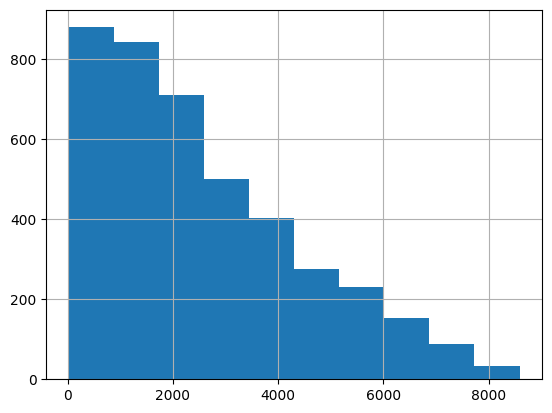

In [ ]:
train['TotalCharges'].describe()
train['TotalCharges'].hist()



In [ ]:
# target 기술 통계
print(train['TotalCharges'].describe())

count    4116.000000
mean     2566.580782
std      1911.356766
min        20.030000
25%      1020.922500
50%      2144.285000
75%      3765.670000
max      8589.600000
Name: TotalCharges, dtype: float64


In [ ]:
# 데이터 전처리
# train = train.drop('customerID', axis=1)    # customerID 삭제안한고 해보자
# test = test.drop(['customerID'], axis=1)
target = train.pop('TotalCharges')    # 팝에는 2가지를 동시에 한다. 타겟생성하고.. 트레인에는 해당 칼럼 삭제한다.
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4116 entries, 0 to 4115
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
4116 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


In [ ]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
cols = train.select_dtypes(include='O').columns  # object인 칼럼만 모아서 인코딩하려고 한 것이네. 칼럼즈네...

for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])  # object인 칼럼들 전체를 모아서 cols로 한 것이네..
    test[col] = le.transform(test[col])

In [ ]:

# 검증데이터 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape


# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)
pred[:10]


# MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val, pred))
# 951.0960435538027

# LightGBM
import lightgbm as lgb
lg = lgb.LGBMRegressor(random_state=0, verbose=-1)
lg.fit(X_tr, y_tr)
pred = lg.predict(X_val)
print(mean_absolute_error(y_val, pred))
# 952.7925407798712


# 최종 제출 파일
pred = rf.predict(test)
result = pd.DataFrame({
    'pred':pred
})
result.to_csv("result.csv", index=False)


# 1. pred 행의 수
print(pred.shape)

# 2. 생성한 csv 확인
print(pd.read_csv("result.csv").head())

943.3142435679613
963.5494148723782


ValueError: could not convert string to float: 'CUST0769'

In [89]:
import pandas as pd
import numpy as np
train = pd.read_csv('C:/facebook.csv')

train.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/facebook.csv'